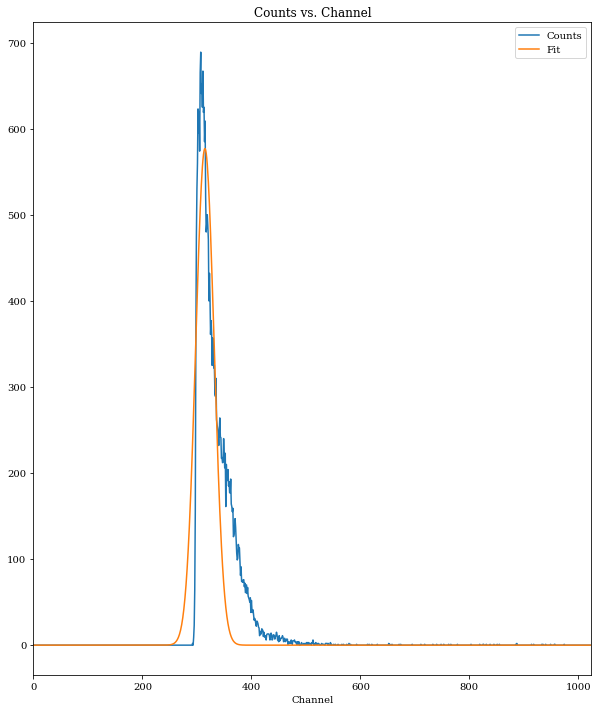

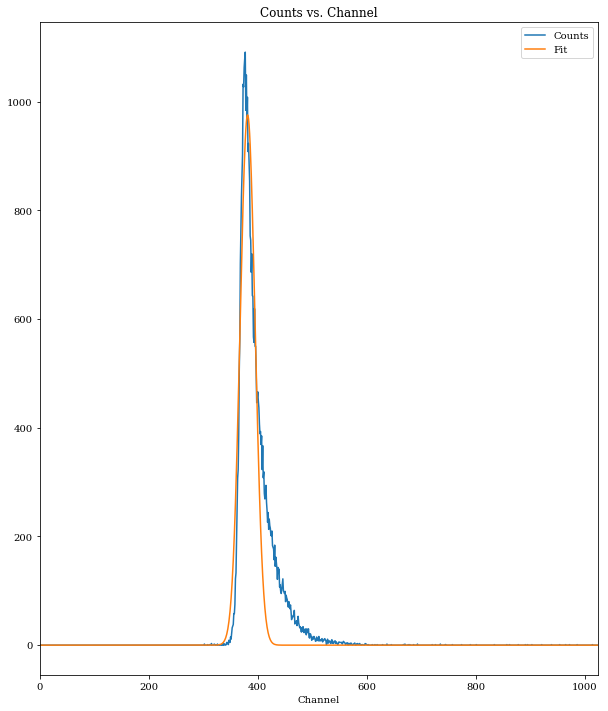

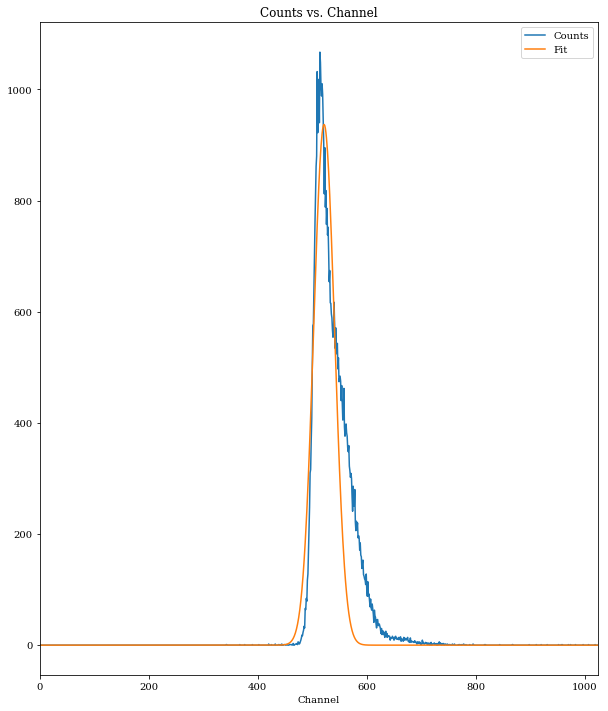

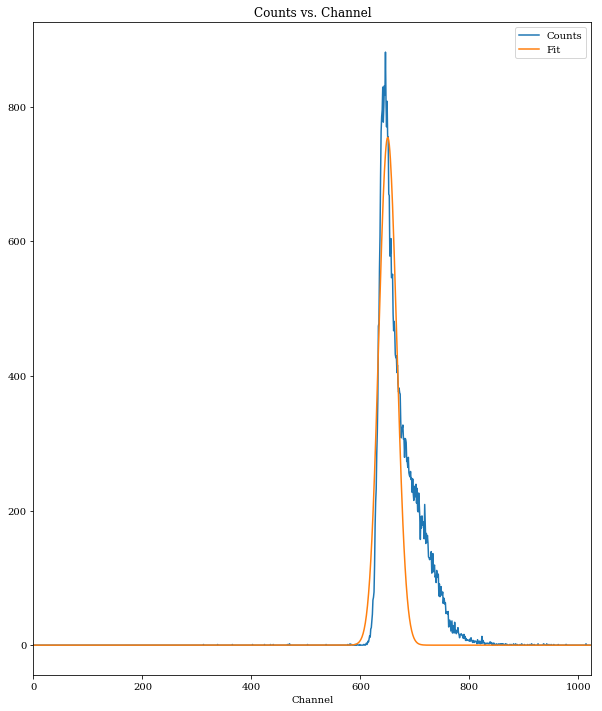

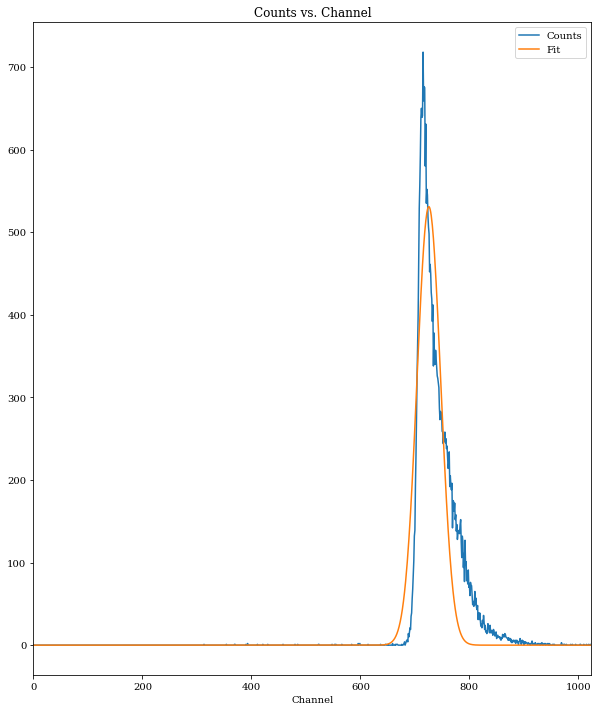

[75.0, 100.6, 150.0, 200.0, 225.0] [314.67295355357953, 381.30032876511717, 521.63402353433946, 650.17693127218638, 725.5703913930123] [16.886965159656487, 13.746550573493767, 19.216627311390766, 16.447686379175902, 21.69788405408222]
                            WLS Regression Results                            
Dep. Variable:                      x   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     8699.
Date:                Thu, 02 Nov 2017   Prob (F-statistic):           2.72e-06
Time:                        16:41:42   Log-Likelihood:                -7.5111
No. Observations:                   5   AIC:                             19.02
Df Residuals:                       3   BIC:                             18.24
Df Model:                           1                                         
Covariance Type:            nonrobust                 

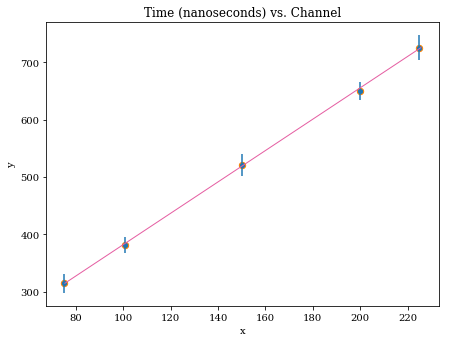

[75.0, 100.6, 150.0, 200.0, 225.0] [314.67295355357953, 381.30032876511717, 521.63402353433946, 650.17693127218638, 725.5703913930123] [16.886965159656487, 13.746550573493767, 19.216627311390766, 16.447686379175902, 21.69788405408222]
(2.7328747911763283, 0.029301835345694426)


In [46]:
%matplotlib inline

import pandas
import numpy as np

import matplotlib.pyplot as plt
import analysis
reload(analysis)
#import calibration
#reload(calibration)
reload(plt)

#plt.rc('font', **{'family': 'serif', 'weight': 'normal', 'size': 16})
#plt.rc('text', usetex=False)

ranges = [(292, 350), (350, 410), (475,555), (610, 685), (680,790)]
data = []
lengths = [75.0, 100.6, 150.0, 200.0, 225.0]
means = []
stds = []

for i in range(5):
    data = pandas.read_csv('data/data{}.csv'.format(i))
    a, mean, std = analysis.find_gaussian(data, ranges[i])
    means.append(mean)
    stds.append(std)
    data['Fit'] = data['Channel'].apply(lambda chan: analysis.gauss_function(chan, a, mean, std))
    plt.clf()
    fig = plt.figure()
    fig.set_size_inches(10, 12)
    ax = fig.add_subplot(111, axisbg='w')

    data.plot(
        x='Channel',
        y='Counts',
        ax=ax
    )

    data.plot(
        x='Channel',
        y='Fit',
        ax=ax,
        title='Counts vs. Channel'
    )
    
    plt.show()

params = analysis.find_regression(lengths, means, stds)
wls_fit = params[2]
print(wls_fit.summary())
ws = params[3]

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='w')
ax_fit = ws.plot(
    kind='scatter',
    x='x',
    y='y',
    yerr='yerr',
    style='o',
    alpha=1.,
    ax=ax,
    title='Time (nanoseconds) vs. Channel',
    edgecolor='#ff8300',
    s=40
)

# weighted prediction
wp, = ax.plot(
    wls_fit.predict(),
    ws['y'],
    color='#e55ea2',
    lw=1.,
    alpha=1.0,
)

plt.tight_layout()
fig.set_size_inches(6.40, 5.12)
plt.savefig("time_fit.png", dpi=100, alpha=True)
plt.show()

plt.show()

print analysis.m_S(lengths, means, stds)
